In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from fpfs import pltutil
import astropy.io.ascii as pyascii
import matplotlib.pylab as plt

In [6]:
ls sum_i_basic1/

bin_M00.fits  try1_bin_M00.csv


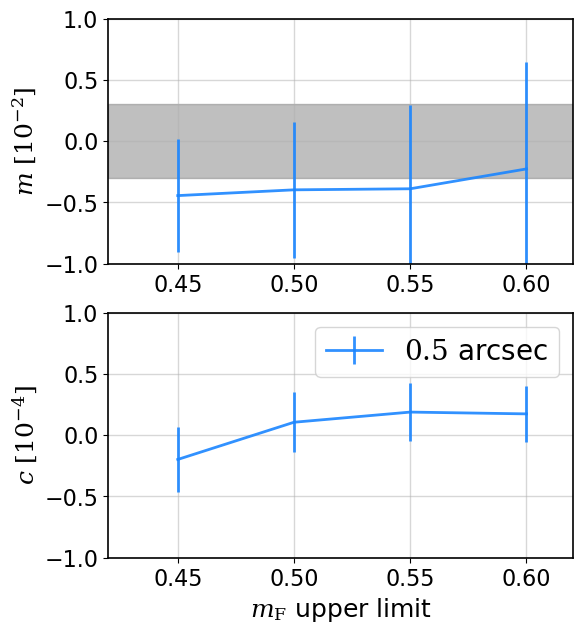

In [12]:
# make plot
plt.close()
fig,axes=pltutil.make_figure_axes(ny=2,nx=1,square=False)

x = np.array([0.45, 0.5, 0.55, 0.60])
y1 = []
yerr = []
z1 = []
zerr = []
# read data
for itt in range(1,5):
    outs = pyascii.read('./sum_i_basic%d/try1_bin_M00.csv' %itt)
    y1.append(outs['mbias'][1])
    yerr.append(outs['merr'][1])
    z1.append(outs['cbias'][1])
    zerr.append(outs['cerr'][1])

ax=axes[0]
xlabel=r'$m_{\rm F}$ upper limit'
ax.errorbar(np.array(x),np.array(y1)*1e2,np.array(yerr)*1e2,label=r'$0.5$ arcsec',color=pltutil.colors[1])

ax.set_ylabel('$m$ $[10^{-2}]$',fontsize=18)
ax.set_xlim(0.42, 0.62)
ax.axvline(25.,color='black',ls='-.')
ax.set_ylim(-1,1.)
ax.axhspan(-0.3,0.3,0,100,color='gray',alpha=0.5)
ax.grid()


ax=axes[1]
ax.errorbar(np.array(x),np.array(z1)*1e4,np.array(zerr)*1e4,label=r'$0.5$ arcsec',color=pltutil.colors[1])
ax.legend()
ax.set_ylabel('$c$ $[10^{-4}]$',fontsize=18)
ax.set_xlim(0.42, 0.62)
ax.axvline(25.,color='black',ls='-.')

ax.set_ylim(-1,1)
ax.set_xlabel(xlabel,fontsize=18)
ax.grid()
plt.show()